In [38]:
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib.pyplot as plt
import itertools
import math
import sys

# 1. Conjugate priors


## 1.1 Discrete sampling distributions

### Binomial sampling distribution, beta prior

In [6]:
def beta_plot(alpha, beta):
    x = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, spst.beta.pdf(x, alpha, beta),
           'b-', lw=5, alpha=0.6, label='beta pdf')

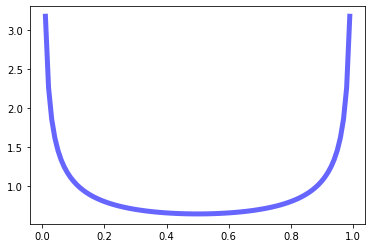

In [7]:
# Jeffery distribution
beta_plot(1/2, 1/2)

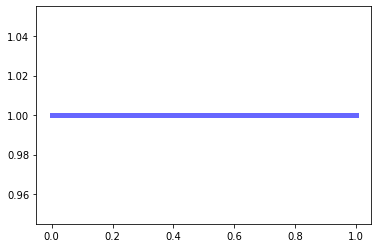

In [8]:
# uniform distribution
beta_plot(1, 1)

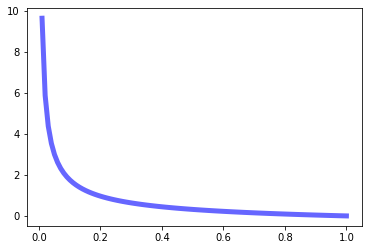

In [9]:
beta_plot(0.3, 2)

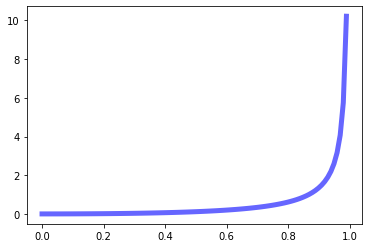

In [10]:
beta_plot(3, 0.2)

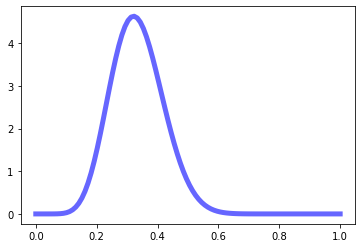

In [12]:
beta_plot(10,20)

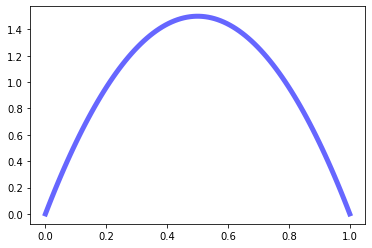

In [13]:
beta_plot(2, 2)

### Predictive distribution

the prior distribution influencing the inference on θ 

$X \sim B(n, \theta)$

$\pi_{\theta}(t|\alpha, \beta) = beta(t;\alpha, \beta)$

In [ ]:
def L_Pr_Po(alph, beta, x, n):
    t = np.arange(0, 1, 0.01)
    likelihood = [loglike((100, i), spst.binom, x) for i in t]
    prior_function = spst.beta.pdf(t, alph, beta)
    post_function = spst.beta.pdf(t, x + alph, n - x + beta)

    fig, axs = plt.subplots(1, 3, sharex=True, tight_layout=True)
    axs[0].plot(t, likelihood)
    axs[1].plot(t, prior_function)
    axs[2].plot(t, post_function)

/Users/yunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


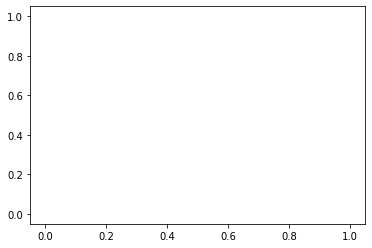

In [34]:
# on the notebook
combin = lambda n,k: math.factorial(n)//(math.factorial(k)*math.factorial(n-k))

def beta_plot(x, n, n0, alpha, beta):
    X0 = np.linspace(0, n0, n0 + 1)
    predictive = []
    for x0 in X0:
        predictive.append(combin(n0, x0) * 
                          spst.beta.pdf(x0, alpha + x + x0, beta + n - x + n0 - x0)/
                          spst.beta.pdf(x0, alpha + x, beta + n - x))
        
    fig, ax = plt.subplots(1, 1)
    ax.plot(X0, predictive,
           'b-', lw=5, alpha=0.6, label='beta pdf')
    
beta_plot(x = 40, n = 100, n0 = 20, alpha = 1/2, beta = 1/2)

In [49]:
x = 40
n = 100
n0 = 20
alpha = 1/2
beta = 1/2

predictive = []
x0 = 2
combin = lambda n,k: math.factorial(n)//(math.factorial(k)*math.factorial(n-k))

predictive.append(combin(n0, x0) * (spst.beta.pdf(x0, alpha + x + x0, beta + n - x + n0 - x0)/spst.beta.pdf(x0, alpha + x, beta + n - x)))
print(predictive)


[nan]


/Users/yunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [46]:
n0
x0


20

2

In [45]:
combin(n0, x0)

190

### Poisson sampling distribution